In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.utils.data
import numpy as np
from keras.preprocessing.text import one_hot
import warnings
from gensim.models import Word2Vec
import torch.nn.functional as F
warnings.filterwarnings("ignore")
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
os.chdir('/content/gdrive/MyDrive/CS772')

In [ ]:
embeddings_dict = {}
with open("glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [ ]:
embeddings_dict['the'].shape[0]

300

In [ ]:
'''
About the task:

You are provided with a codeflow- which consists of functions to be implemented(MANDATORY).

You need to implement each of the functions mentioned below, you may add your own function parameters if needed(not to main).
Execute your code using the provided auto.py script(NO EDITS PERMITTED) as your code will be evaluated using an auto-grader.
'''

num_words = 300
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'
vocabulary = []
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

def encode_data(text,train=True):
    # This function will be used to encode the reviews using a dictionary(created using corpus vocabulary) 
    
    # Example of encoding :"The food was fabulous but pricey" has a vocabulary of 4 words, each one has to be mapped to an integer like: 
    # {'The':1,'food':2,'was':3 'fabulous':4 'but':5 'pricey':6} this vocabulary has to be created for the entire corpus and then be used to 
    # encode the words into integers 

    # full = []
    # for lines in text['reviews']:
    #   for word in lines:
    #     full.append(word)
    # unique_words = set(full)
    # #vocab_length = len(corpus_unique_words)
    # vocab_length = len(unique_words)
    # print(vocab_length)
    # for i in range(0,len(text['reviews'])):
    #   line = (" ").join(text['reviews'].iloc[i])
    #   text['reviews'].iloc[i] = one_hot(line,vocab_length)
    
    new_list=[]

    for i in text['reviews']:
        new_list.append(i)	
      
    ls = list(embeddings_dict.keys())
    text['reviews'] = [np.sum([embeddings_dict[word] for word in post if word in ls],axis=0) for post in new_list]

    return text


def convert_to_lower(text):
    # return the reviews after convering then to lowercase
    return text.apply(lambda row :row.lower())


def remove_punctuation(text):
    # return the reviews after removing 
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text


def remove_stopwords(text):
    # return the reviews after removing the stopwords
    # print('before stopword removal',text)
    stop = stopwords.words('english')
    stop = []
    return text.apply(lambda x: (" ").join([item for item in x.split() if item not in stop]))
    

def perform_tokenization(text):
    # return the reviews after performing tokenization
    return text.apply(lambda row : word_tokenize(row))


def perform_padding(data):
    # return the reviews after padding the reviews to maximum length
    # pd.options.mode.chained_assignment = None  # default='warn'
    # #review_max_length = data['reviews'].str.len().max()
    # max_length = 29
    # for i in range(0,len(data['reviews'])):
    #     data['reviews'].iloc[i] += ['0']*(max_length - len(data['reviews'].iloc[i]))
    #     data['reviews'].iloc[i] = np.array(data['reviews'].iloc[i]).astype('int64')

    
    padded_posts = []

    for post in encoded_docs:
    # Pad short posts with alternating min/max
      if len(post) < MAX_LENGTH:
          
          # Method 2
          pointwise_avg = np.mean(post)
          padding = [pointwise_avg]
          
          post += padding * ceil((MAX_LENGTH - len(post) / 2.0))
        
      # Shorten long posts or those odd number length posts we padded to 51
      if len(post) > MAX_LENGTH:
          post = post[:MAX_LENGTH]
    
      # Add the post to our new list of padded posts
      padded_posts.append(post)
    return padded_posts

def preprocess_data(data,train = True):
    # make all the following function calls on your data
    # EXAMPLE:->
    

    review = data["reviews"]
    review = convert_to_lower(review)
    review = review.apply(remove_punctuation)
    data["reviews"] = review
    #review = remove_stopwords(review)
    # data = remove_stopwords(data)
    review = perform_tokenization(review)
    data["reviews"] = review
    data = encode_data(data,train)
    review = data["reviews"]
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    print(data)
    # print(review)
    # data = perform_padding(data)
    
    return data



In [ ]:
np.random.seed(0)

import torch.nn as nn
import nltk
nltk.download('punkt')
from sklearn.metrics import classification_report
from math import log2
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from collections import Counter

validation = 0
main_model = ''
def softmax_activation(x):
    # write your own implementation from scratch and return softmax values(using predefined softmax is prohibited)
    # print((torch.exp(x) - torch.max(torch.exp(x)))/ (torch.sum(torch.exp(x),axis=0) - torch.max(torch.exp(x))))
    x=x-torch.max(x)
    return torch.exp(x)/(torch.sum(torch.exp(x),axis=0))


class NeuralNet(nn.Module):

    def __init__(self,train_data_loader,val_data_loader):
        super(NeuralNet, self).__init__()
        self.rnn = nn.RNN(input_size=num_words,hidden_size=256,num_layers=2, batch_first=True, nonlinearity='relu')
        # self.layer1 = nn.Linear(300,512)
        # self.dropout1 = nn.Dropout(0.5)
        # self.normal1 = nn.BatchNorm1d(512)
        # self.layer2 = nn.Linear(512,128)
        # self.dropout2 = nn.Dropout(0.2)
        # self.normal2 =  nn.BatchNorm1d(128)
        # self.layer3 = nn.Linear(128,5)
        
        
        self.train_data_loader = train_data_loader
        self.val_data_loader = val_data_loader
        # input_dim = 300
        # hidden_dim = 100
        # layer_dim = 1
        # output_dim = 5
        # super(NeuralNet, self).__init__()
        # # Hidden dimensions
        # self.hidden_dim = hidden_dim

        # # Number of hidden layers
        # self.layer_dim = layer_dim

        # # Building your RNN
        # # batch_first=True causes input/output tensors to be of shape
        # # (batch_dim, seq_dim, input_dim)
        # # batch_dim = number of samples per batch
        # self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')

        # # Readout layer
        self.fc = nn.Linear(256, 5)


    def build_nn(self,dt):
        # #add the input and output layer here; you can use either tensorflow or pytorch
        # x1 = self.layer1(dt)
        # x1 = self.dropout1(x1)
        # x1 = self.normal1(x1)
        # x1 = F.relu(x1)
        dt = dt.view(dt.shape[0],1,dt.shape[1])
       
        rnn_out, hidden = self.rnn(dt)
        rnn_out = rnn_out.contiguous().view(-1, 256)
        
        x1 = F.relu(rnn_out)

        # x1 = self.layer2(x1)
        # x1 = self.dropout2(x1)
        # x1 = self.normal2(x1)

        # x1 = F.relu(x1)
        # x1 = self.layer3(x1)
        

        x1 = self.fc(x1)
        return x1

        # # Initialize hidden state with zeros
        # # (layer_dim, batch_size, hidden_dim)
        # h0 = torch.zeros(self.layer_dim, dt.size(0), self.hidden_dim).requires_grad_()

        # # We need to detach the hidden state to prevent exploding/vanishing gradients
        # # This is part of truncated backpropagation through time (BPTT)
        # out, hn = self.rnn(dt, h0.detach())

        # # Index hidden state of last time step
        # # out.size() --> 100, 28, 10
        # # out[:, -1, :] --> 100, 10 --> just want last time step hidden states! 
        ##x1 = self.fc(x1[:, -1, :]) 
        # # out.size() --> 100, 10
        ##return x1

    # calculate cross entropy
    def cross_entropy(p, q):
	      return -sum([p[i]*log2(q[i]) for i in range(len(p))])
   

    def train_nn(self,batch_size,epochs,optimizer,model):
        global validation,main_model
        # write the training loop here; you can use either tensorflow or pytorch
        loss_cr = nn.CrossEntropyLoss()
        train_ls = []
        val_ls  = []
        train_acc = []
        val_acc = []
        
        for epoch in range(epochs):
            #for param in model.parameters():
            #  print(param.data)
            # For training
            tot_loss = 0
            #keeping track of loss
            correct = 0
            total = 0
            for (batch,label) in self.train_data_loader:
                data = batch
                labels = label
                #initializing all the gradients to be zero
                optimizer.zero_grad()
                output = model.build_nn(data)
                loss = loss_cr(output,labels)
                #getting the total loss
                tot_loss = loss.item()
                #For backpropagation
                loss.backward()
                optimizer.step()
                total += labels.size(0)
                _,pred = torch.max(output.data,1)
                correct += (pred == labels).sum().item()
            train_acc1 = 100 * correct / total
            train_acc.append(train_acc1)
            
            # print validation accuracy

            val_loss=0
            #making sure that training is not set to true while validation
            # Training has already been done before and we have obtained the values of our parameters after training that we shall use for making the predictions
            # We shall use the validation set to tune the hyperparameters that we use
            model.eval()
            correct = 0
            total = 0
            #Now, similar to above, we take batch  from validation data, one batch containing 16 examples in one iteration
            for batch in self.val_data_loader:
                data = batch[0]
                labels = batch[1]
                output = model.build_nn(data)
                loss = loss_cr(output,labels)
                val_loss = loss.item()
                total += labels.size(0)
                _,pred = torch.max(output.data,1)
                correct += (pred == labels).sum().item()
            valid_acc = 100 * correct / total
            val_acc.append(valid_acc)


            train_ls.append(tot_loss)
            val_ls.append(val_loss)
            if validation < val_acc[-1]:
              validation = val_acc[-1]
              main_model = model
              print('updating model')
              pickle.dump(model, open('Rnn_Glove_model_withoutsmote.pkl','wb'))
            
            print(f'Epoch {epoch} --> Train loss: {tot_loss} Train accuracy: {train_acc[-1]} Val loss: {val_loss} Val accuracy: {val_acc[-1]}')
            
        return 0
       
    def predict(self, data,model1):
        
            
        output = model1.build_nn(data)
        pred,index = torch.max(output,1)
        
        return index + 1,output
        # return a list containing all the ratings predicted by the trained model


# DO NOT MODIFY MAIN FUNCTION'S PARAMETERS

def main(train_file, test_file):
    global train_dataset
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    valid_data = pd.read_csv("gold_test.csv")
    batch_size = 1024
    epochs = 25
    
    
    #preprocessing the data
    train_dataset=preprocess_data(train_data) 
    train_dataset = train_dataset.loc[:,~train_dataset.columns.str.match("Unnamed")]
    validation_dataset = preprocess_data(valid_data,False) 
    validation_dataset = validation_dataset.loc[:,~validation_dataset.columns.str.match("Unnamed")]
    test_dataset=preprocess_data(test_data,False)
    test_dataset = test_dataset.loc[:,~test_dataset.columns.str.match("Unnamed")]
    # print(train_dataset)

    #converting data into a tensor
    X = torch.tensor(train_dataset['reviews'], dtype=torch.float)

    #Normalizing the training data to keep it over a smaller range
    X = (X - torch.mean(X))/torch.std(X)
    y = torch.tensor(train_dataset['ratings'], dtype=torch.float) -1
    
#     y = y - torch.tensor(1).expand_as(y)
    y = y.to(torch.int64)

    #validation_data
    X_val = torch.tensor(validation_dataset['reviews'], dtype=torch.float)

    #Normalizing the training data to keep it over a smaller range
    X_val = (X_val - torch.mean(X_val))/torch.std(X_val)
    y_val = torch.tensor(validation_dataset['ratings'], dtype=torch.float) -1
    
#     y = y - torch.tensor(1).expand_as(y)
    y_val = y_val.to(torch.int64)
    # X_train,X_val,y_train, y_val = train_test_split(X,y,test_size=0.2,shuffle=True)
    # sm = SMOTE()
    # X1,y1 = sm.fit_resample(X,y)
    #over = SMOTE()
    #under = RandomUnderSampler()
    #steps = [('o', over), ('u', under)]
    #pipeline = Pipeline(steps=steps)
    #smotenc = SMOTENC([1],random_state = 101)
    #adasyn = ADASYN(random_state = 101)
    #X1,y1 = adasyn.fit_resample(X,y)
    #print('Original dataset shape:', Counter(y))
    #print('Resample dataset shape:', Counter(y1))
    X1 = torch.tensor(X,dtype=torch.float)
    y1 = torch.tensor(y,dtype=torch.int64)
    train_dataset = torch.utils.data.TensorDataset(X1,y1)


    #concatinating back the splitted datasets

    # train_dataset = torch.utils.data.TensorDataset(X_train,y_train)
    validation_dataset = torch.utils.data.TensorDataset(X_val,y_val)
    # print(train_dataset)
    
    #loading the trining and validation dataset into batches
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)
    
    #converting test data into tensor then normalizing it and loading it in batches
    test_dataset = torch.tensor(test_dataset['reviews'], dtype=torch.float)
    test_dataset = (test_dataset - torch.mean(test_dataset))/torch.std(test_dataset)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
    #caaling the Neural Network model
    model=NeuralNet(train_loader,val_loader)
    # model.build_nn()
    lr = 0.001
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.train_nn(batch_size,epochs,optimizer,model)
    main_model = pickle.load(open('Rnn_Glove_model_withoutsmote.pkl','rb'))
    output,_ = main_model.predict(test_dataset,main_model)
    # output = model.predict(test_dataset,model)
    output = output.cpu().detach().numpy()
    print('output:',output)
    return output

val = []

if __name__ == "__main__":
    val=main("train.csv","test.csv")
    original_data = pd.read_csv("gold_test.csv")['ratings']
    print(val)
    print(classification_report(original_data, val))

 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
                                                 reviews  ratings
0      [-0.16103081, 1.117611, 0.54722, -3.1446133, -...        4
1      [-3.691787, 2.9042442, 0.20526475, -3.1699367,...        5
2      [-1.0112369, 0.9304441, -0.749542, -1.7810811,...        1
3      [-0.661793, 1.7722659, -0.7591514, -1.2413799,...        5
4      [-1.3102452, 0.0037270784, 0.305426, -3.31586,...        5
...                                                  ...      ...
49995  [-0.043774694, 0.76430607, -0.69689703, -0.028...        1
49996  [-0.54387236, 4.188421, -0.53689635, -2.829497...        1
49997  [-1.438199, 0.09414096, -2.033925, 0.002289295...        1
49998  [-0.2626176, 1.0997031, -4.746772, -2.811391, ...        1
49999  [-1.3394722, -0.750192, -1.3944495, -3.343958,...        5

[50000 rows x 2 columns]
                                                reviews  ratings
0     [-2.0

In [ ]:
from sklearn import metrics
original_data = pd.read_csv("gold_test.csv")['ratings']
print("accuracy:",metrics.accuracy_score(original_data,val))
print("recall:",metrics.recall_score(original_data,val,average = 'weighted'))
print("precision:",metrics.precision_score(original_data,val,average = 'weighted'))
print("f1:",metrics.f1_score(original_data,val,average = 'weighted'))

accuracy: 0.6768
recall: 0.6768
precision: 0.6117217223342535
f1: 0.6152277413124024


Confusion matrix
[[ 721   77  121   95  257]
 [ 216   51  116   79  168]
 [ 131   52  205  222  301]
 [  74   22  145  357  806]
 [ 148   25  124  492 4995]]


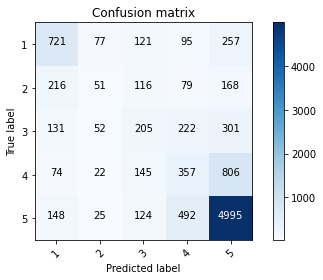

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
cnf_matrix = confusion_matrix(original_data, val,labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix')

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.1MB 6.0MB/s 
     |████████████████████████████████| 215kB 15.6MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 3.2MB 13.4MB/s 
     |████████████████████████████████| 962kB 40.4MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=3c2beb9f13df65c1701fe8a5b9705f88a33dc9d70e42753e5bb97fdd6be4b166
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=296e9d032761ec01a6517da675825185e68840f4fd826757246c198c478f0617
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for Flask-BasicAuth: filename=Flask_BasicAuth-0.2.0-cp37-none-any.whl size=4232 sha256=05dee1356cf274015d8b45099b838b5eac435f47d9a697789d4a9f454f18c3eb
  Stored in directory

In [ ]:
import gradio as gr
def generate_text(inp):
    line = []
    line.append(inp)
    df = pd.DataFrame()
    df['reviews'] = pd.Series(line)

    df=preprocess_data(df,False)
    df = df.loc[:,~df.columns.str.match("Unnamed")]

    df = torch.tensor(df['reviews'], dtype=torch.float)
    df = (df - torch.mean(df))/torch.std(df)

    Model = pickle.load(open('Rnn_Glove_model_withoutsmote.pkl','rb'))
    index,out = Model.predict(df,Model)
    out = out.cpu().detach().numpy()
    index = index.cpu().detach().numpy()
    x = out
    e_x = np.exp(x - np.max(x))
    arr = e_x / e_x.sum() 
    dictionary = dict(zip(['1','2','3','4','5'], map(float, arr[0])))
    # "probabilities: {},sentiment :{}".format( str(arr[0]),str(index[0]))

    return dictionary
#gr.outputs.Textbox()
gr.Interface(generate_text,
             "textbox", 
             gr.outputs.Label(num_top_classes=5)).launch(share=True) #, debug=True Use in Colab

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://14162.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://14162.gradio.app')